In [1]:
from week12_functions import *

### 6.1 Message no self-loops

c:\Users\Jakob\AU7 - Computational physics python\Week12\week12_functions.py:38: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3687.)
  ax.scatter(*pos.T, c=f'C{int(x)}', s=s, edgecolors='black')


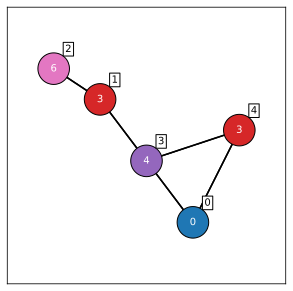

In [2]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [3, 0],
                       [0, 4],
                       [4, 0],
                       [3, 4],
                       [4, 3],
                       [1, 3],
                       [3, 1],
                       [1, 2],
                       [2, 1]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)
pos = torch.tensor([[0,0], [-2, 2], [-3, 2.5], [-1, 1], [1, 1.5]])
graph = Data(x=x, edge_index=edge_index, pos=pos)

fig, ax = plt.subplots(figsize=(5, 5))
plot_graph(ax, graph, s=1000)
nice_plot_nodes(ax)

fig.savefig('ex60_fig1.png')

b) Write a GNN message passing layer, `gnn1_layer`, that outputs:
$$ \sum_{j\in\mathcal{N}_i}x_j $$

In [3]:
class CustomMessagePassing(MessagePassing):
    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)

c) Check that if you call it

In [4]:
gnn1_layer = CustomMessagePassing(aggr='add')
gnn1_layer(graph.x, graph.edge_index)

tensor([[ 7.],
        [10.],
        [ 3.],
        [ 6.],
        [ 4.]])

### 6.2 Message, attribute update
d) Use the GNN layer to update the node attributes according to:
$$ x_i^{k+1} = \sum_{j\in\mathcal{N}_i}x_j^k $$

In [5]:
graph.x = gnn1_layer(graph.x, graph.edge_index)
graph.x

tensor([[ 7.],
        [10.],
        [ 3.],
        [ 6.],
        [ 4.]])

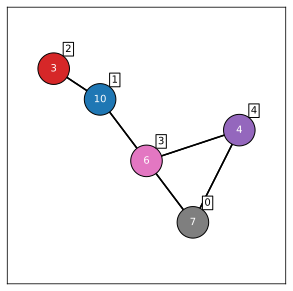

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
plot_graph(ax, graph, s=1000)
nice_plot_nodes(ax)

fig.savefig('ex60_fig2.png')

e) Make a 2nd update.

In [7]:
graph.x = gnn1_layer(graph.x, graph.edge_index)
graph.x

tensor([[10.],
        [ 9.],
        [10.],
        [21.],
        [13.]])

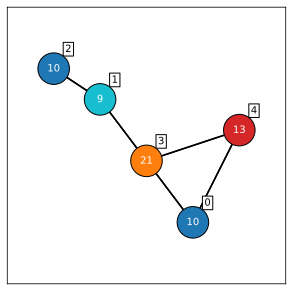

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
plot_graph(ax, graph, s=1000)
nice_plot_nodes(ax)

fig.savefig('ex60_fig3.png')

### 6.3 Message self-loops
f) Add self-loops and repeat d) and e).

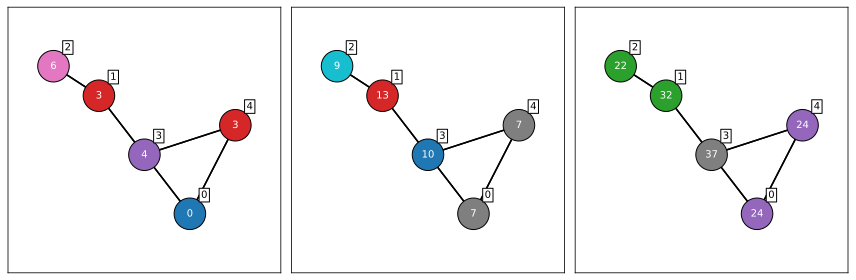

In [9]:
# Redefine the graph
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [3, 0],
                       [0, 4],
                       [4, 0],
                       [3, 4],
                       [4, 3],
                       [1, 3],
                       [3, 1],
                       [1, 2],
                       [2, 1]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)
pos = torch.tensor([[0,0], [-2, 2], [-3, 2.5], [-1, 1], [1, 1.5]])
graph = Data(x=x, edge_index=edge_index, pos=pos)

# Write a custom message passing layer that includes self loops
from torch_geometric.utils import add_self_loops
class SelfLoopMessagePassing(MessagePassing):
    def forward(self, x, edge_index):
        # Add self-loops to the edge_index
        edge_index_with_loops, _ = add_self_loops(edge_index, num_nodes=x.size(0))
        
        # Propagate messages using the updated edge_index
        return self.propagate(edge_index_with_loops, x=x)

gnn2_layer = SelfLoopMessagePassing(aggr='add')

# Apply the layer to the graph twice, plotting the original and the two updated graphs
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_graph(axes[0], graph, s=1000)
nice_plot_nodes(axes[0])
for ax in axes[1:]:
    graph.x = gnn2_layer(graph.x, graph.edge_index)
    plot_graph(ax, graph, s=1000)
    nice_plot_nodes(ax)
plt.tight_layout()

fig.savefig('ex60_fig4.png')

### 6.4 Aggregation with max
g) Repeat f), where the GNN layer implements:
$$ x_i^{k+1} = \max_{j\in\mathcal{N}_i}x_j^k $$

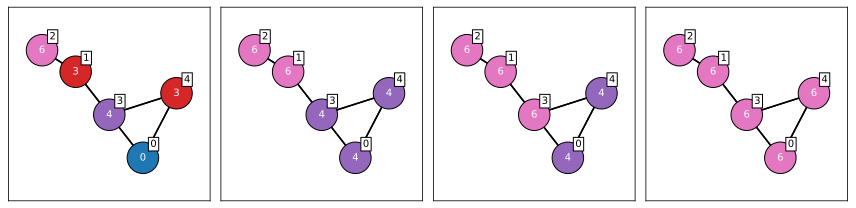

In [10]:
gnn3_layer = SelfLoopMessagePassing(aggr='max')
graph = Data(x=x, edge_index=edge_index, pos=pos)

# Apply the layer to the graph twice, plotting the original and the three updated graphs
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
plot_graph(axes[0], graph, s=1000)
nice_plot_nodes(axes[0])
for ax in axes[1:]:
    graph.x = gnn3_layer(graph.x, graph.edge_index)
    plot_graph(ax, graph, s=1000)
    nice_plot_nodes(ax)
plt.tight_layout()

fig.savefig('ex60_fig5.png')